# read data.csv file and clean the data

In [57]:
import numpy as np
import pandas as pd


In [58]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv"

In [59]:
df = pd.read_csv('data.csv')

In [60]:
df.columns


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [61]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [62]:
df.columns= df.columns.str.lower().str.replace(' ', '_')
df.columns



Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [63]:
df.dtypes     # index = column name 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [64]:
df.dtypes.index    # acces index

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [65]:
df.dtypes[df.dtypes=='object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [66]:
strings =  list(df.dtypes[df.dtypes == 'object'].index)  # store as a list
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [67]:
for co in strings:
    df[co]= df[co].str.lower().str.replace(' ', '_')    #replace spaces with underscore

In [68]:
df.head(2)
     


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [69]:
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [70]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [71]:
import matplotlib.pyplot as plt 

In [72]:
import seaborn as sns 

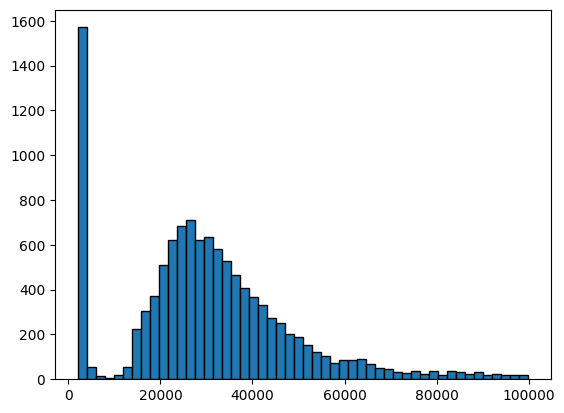

In [73]:
plt.hist( df.msrp[df.msrp< 100000] , bins=50 , edgecolor='black' )
plt.show()

In [74]:
np.log([1,2,300,2000000])

array([ 0.        ,  0.69314718,  5.70378247, 14.50865774])

In [75]:
prices = np.log1p(df.msrp)
prices

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

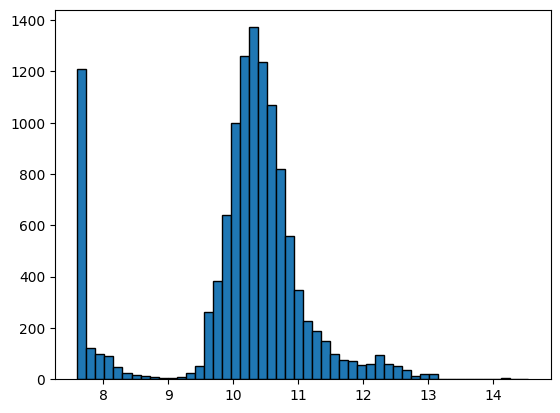

In [76]:
plt.hist( prices , bins=50 , edgecolor='black' )
plt.show()

In [77]:
df.isnull()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
len(df)

11914

In [79]:
df.isnull().head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df.isnull().sum()     # gives the number of null values  coloumn wise

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [81]:
df[ 
df['number_of_doors'].isnull() 
]                                   #will give a new datframe which includes all rows that null value in number_of_doors coloumn


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4666,ferrari,ff,2013,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,NaN,"exotic,high-performance",large,coupe,16,11,2774,295000
6930,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,105,102,1391,79500
6931,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,101,98,1391,66000
6932,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,high-performance",large,sedan,105,92,1391,134500
6933,tesla,model_s,2016,electric,NaN,0.0,direct_drive,rear_wheel_drive,NaN,"exotic,performance",large,sedan,100,97,1391,74500
6934,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,107,101,1391,71000


# validation frame work ( split data for training , validation , testing)

In [82]:
n = len(df)
n_train= int(n*0.6)   # 60percent
n_val= int(n*0.2)     # 20percent         
n_test= int(n*0.2)     # 20percent

In [83]:
n , n_train, n_test, n_val

(11914, 7148, 2382, 2382)

In [84]:
df.iloc[[0,1,2]].head()       # iloc used for accessing rows in dataframes , gives a new df
  

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [85]:
df.iloc[ : 10] # gives a range till 0 to 9

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


# randomly split the data using random.shuffle

In [86]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
dftrain = df.iloc[ idx[ :n_train ] ]       
dftest = df.iloc[ idx[ n_train : n_train+ n_test] ]
dfval = df.iloc[ idx [ n_train+ n_test  : ]]


In [87]:

dftrain.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [88]:
len(dfval) 

2384

In [89]:
dftest['msrp'].values       # to dataframe in numpy array we use .values

array([303300,  37820,  26885, ...,  35750, 145740,  74425], dtype=int64)

In [90]:
dftrain.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [91]:
dftrain.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [92]:
ytrain= dftrain['msrp'].values
ytest= dftest['msrp'].values
yval= dfval['msrp'].values


In [93]:
ytrain = np.log1p(dftrain.msrp.values)
yval = np.log1p(dfval.msrp.values)
ytest = np.log1p(dftest.msrp.values)


### it is good to delete the prices from dataframe to avoid using for training

In [94]:
del dftest['msrp']
del dftrain['msrp']

del dfval['msrp']

In [95]:
dftrain.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [96]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

In [97]:
xtrain = dftrain[ base].fillna(0).values   # made a matrix of umeric coloumns
xval = dfval[ base].fillna(0).values   
xtest= dftest[ base].fillna(0).values

# scikit learn buitin function for linear regression


In [98]:


# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt
# import numpy as np

# # === STEP 1: Scale Features ===
# x_scaler = StandardScaler()
# xtrain_scaled = x_scaler.fit_transform(xtrain)

# # === STEP 2: Fit Model ===
# model = LinearRegression()
# model.fit(xtrain_scaled, ytrain)

# # === STEP 3: Predict ===
# y_pred = model.predict(xtrain_scaled)

# # === STEP 4: Evaluation ===
# rmse = np.sqrt(mean_squared_error(ytrain, y_pred))
# mae = mean_absolute_error(ytrain, y_pred)
# r2 = r2_score(ytrain, y_pred)

# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"R² Score: {r2:.4f}")
# print("ytrain[:5]:", ytrain[:5])
# print("y_pred[:5]:", y_pred[:5])

# # === STEP 5: Plot Predictions vs Actual ===
# plt.hist(ytrain, bins=50, alpha=0.5, label="Actual", color="gray")
# plt.hist(y_pred, bins=50, alpha=0.5, label="Predicted", color="red")
# plt.legend()
# plt.xlabel("Log(Price + 1)")
# plt.ylabel("Frequency")
# plt.title("Predictions vs Actual")
# plt.grid(True)
# plt.show()


# custom functions for gradient descent

In [99]:
def predicted_value ( X , w , b ):  # f = w.x+ b
    return np.dot(X, w) + b


In [100]:
def cost_calculator ( xtrain , ytrain , w, b , lambda_):
    m= xtrain.shape[0]
    cost= 0.0
    
    cost =  (1/(2*m))* np.sum((( np.dot(xtrain , w) +b) - ytrain )**2)
    cost= cost+(lambda_ / (2 * m)) * np.sum(w ** 2)
    return cost
        

In [101]:
def gradients ( xtrain , ytrain , w, b):
    m= xtrain.shape[0]
    n= xtrain.shape[1] 
    dj_dw = np.zeros(n)
    dj_db=0
    predictions= np.dot(xtrain , w) +b
    error = predictions-ytrain
    dj_dw= (1/m)*np.dot(xtrain.T , error)
    dj_db= (1/m)*np.sum(error)
    return dj_dw , dj_db
        

In [102]:
def regression_w_b(xtrain , ytrain ,  iters , alpha , lambda_ , num_indices , cat_indices ):  
    j_hist = np.zeros(iters)
    xtrain_scaled = xtrain.copy()
    x_mean = np.mean(xtrain[:, num_indices], axis=0)
    x_std = np.std(xtrain[:, num_indices], axis=0)
    x_std[x_std == 0] = 1 
    xtrain_scaled[:, num_indices] = (xtrain[:, num_indices] - x_mean) / x_std
    m=xtrain_scaled.shape[1]
    w=np.zeros(m)
    b=0.0
    for i in range (iters):
        dj_dw , dj_db = gradients( xtrain_scaled , ytrain , w, b)
        w = w*(1-(lambda_/m)) - alpha * dj_dw
        b = b - alpha * dj_db
        j_hist[i]= cost_calculator(xtrain_scaled , ytrain , w, b , lambda_)
        if i % (iters //10) == 0:
            print(f" {i} iteration cost : {j_hist[i]} ")
    plt.plot(j_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost vs Iteration")
    plt.grid(True)
    plt.show()
    return j_hist , w, b , x_mean , x_std

            


        

In [103]:
def squared_error(y_true, y_pred):
    m=y_pred.shape[0]
    return (1/(2*m))*(np.sum((y_true - y_pred) ** 2))


    

In [104]:
def compare_histogram( ytrain , y_predict ):
    plt.hist(ytrain, bins=50, alpha=0.5, label="Actual", color="gray")
    plt.hist(y_predict, bins=50, alpha=0.5, label="Predicted", color="red")
    plt.legend()
    plt.xlabel("Log(Price + 1)")
    plt.ylabel("Frequency")
    plt.title("Predictions vs Actual")
    plt.grid(True)
    plt.show()
    print(f"squared error : {squared_error(ytrain , y_predict)}")

In [105]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [106]:
xtrain     # have 5 columns

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 300.,    6.,   31.,   20., 3916.],
       [ 210.,    4.,   30.,   24.,  873.],
       [ 285.,    6.,   22.,   17.,  549.]])

In [107]:
def scale_x ( x , x_mean , x_std , num_indices , cat_indices ):
    x=x.copy()
    
    x[:, num_indices] = (x[:, num_indices] - x_mean) / x_std
    return x

 0 iteration cost : 50.63121936741773 
 1000 iteration cost : 0.28691067657760394 
 2000 iteration cost : 0.2854016732687083 
 3000 iteration cost : 0.28536082860692413 
 4000 iteration cost : 0.2853593578645255 
 5000 iteration cost : 0.28535928734628163 
 6000 iteration cost : 0.28535928333026306 
 7000 iteration cost : 0.28535928308431313 
 8000 iteration cost : 0.28535928306885655 
 9000 iteration cost : 0.2853592830678768 


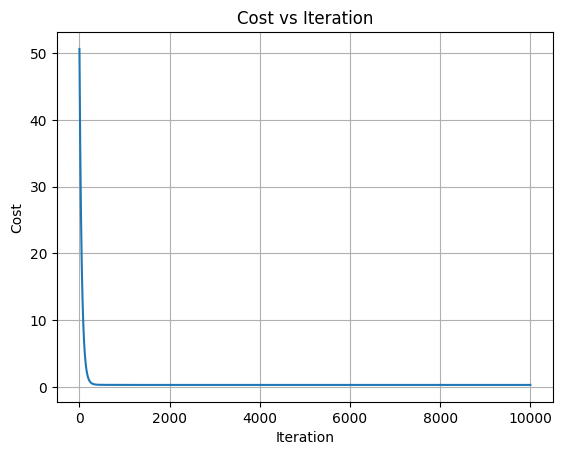

In [136]:
#as of now we do not have any cat_indices

j_hist, w, b , x_mean  , x_std = regression_w_b(xtrain, ytrain, 10000, 0.01 ,0, [0,1,2,3,4] ,[] )    # you can try deffrent number of iterations and have fun




In [137]:
xtrain_scaled = scale_x(xtrain ,   x_mean , x_std , [0,1,2,3,4] , [])

In [138]:
y_pred_4=  np.dot(xtrain_scaled, w)+b
y_pred_4 , ytrain

(array([ 9.54795974,  9.3874622 ,  9.6718481 , ..., 10.59340736,
        10.11122598, 10.30398193]),
 array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.91328684,
        10.28247178, 10.45380308]))

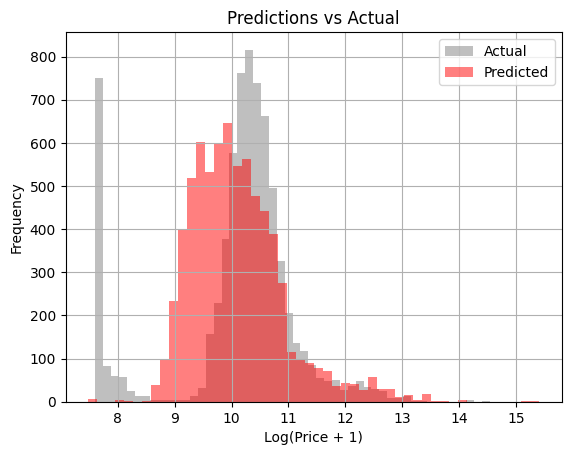

squared error : 0.2853592830678146


In [139]:
compare_histogram(ytrain , y_pred_4)    # as of now aur model is not doing much well


# validation of data using dfval 

In [140]:
w_optimal=w 
b_optimal=b



In [141]:
w_optimal ,b_optimal

(array([ 1.0742127 , -0.28534026,  0.13330076,  0.13632611, -0.01288064]),
 10.10243668554455)

In [142]:
x_scaled_val= scale_x(xval ,   x_mean , x_std , [0,1,2,3,4] , [])
x_scaled_val

array([[-0.900346  , -0.90256455,  0.78794893,  0.46267707, -0.76935177],
       [ 0.38263071,  0.21400371, -0.18140319, -0.19503901,  0.12491662],
       [-0.7467502 ,  0.21400371, -0.71993215, -0.52389705, -0.69065058],
       ...,
       [ 0.02122882,  0.21400371, -0.50452057, -0.52389705,  0.21615428],
       [-0.66543477, -0.90256455,  1.64959526,  1.2300125 ,  0.4606155 ],
       [ 0.07543911,  0.21400371,  0.03400839,  0.02419968, -0.62727175]])

In [143]:
y_pred_val= np.dot(x_scaled_val , w_optimal) +b_optimal
y_pred_val

array([ 9.57083048, 10.40002049,  9.08071194, ...,  9.92271906,
       10.0267983 , 10.13832251])

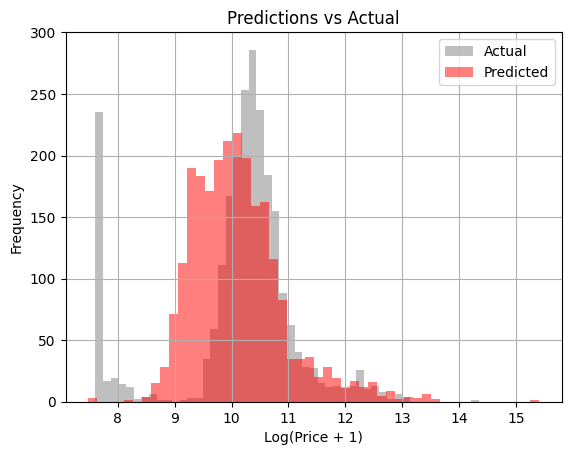

squared error : 0.27059165100210836


In [144]:
compare_histogram(yval , y_pred_val)     #squred error for both of the model is smae so we are good 

# feature engineering 

### make new feature named age

In [145]:
def prepare_x( df ):    #  now we are making  this function couse we do not want to modify aour orignal dataframe 
    df=df.copy()
    features = base.copy()
    df['age']=2017-df.year
    features.append('age')
    df_num=df[features].fillna(0)
    
    
    xnew = df_num.values
    
    return xnew
    

In [146]:
x_train_featured = prepare_x(dftrain)
x_train_featured

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [3.000e+02, 6.000e+00, 3.100e+01, 2.000e+01, 3.916e+03, 2.000e+00],
       [2.100e+02, 4.000e+00, 3.000e+01, 2.400e+01, 8.730e+02, 2.000e+00],
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00]])

In [147]:

# Scale features
def scale_x ( x , x_mean , x_std , num_indices , cat_indices ):
    x=x.copy()
    
    x[:, num_indices] = (x[:, num_indices] - x_mean) / x_std
    return x
    


### check featured model for training data

 0 iteration cost : 32.96061388083865 
 300 iteration cost : 1.4472417205364527 
 600 iteration cost : 0.31233950230264995 
 900 iteration cost : 0.1893296123225216 
 1200 iteration cost : 0.15695418188333943 
 1500 iteration cost : 0.14403410207752665 
 1800 iteration cost : 0.13840424736470228 
 2100 iteration cost : 0.13591494294639067 
 2400 iteration cost : 0.13481081273190043 
 2700 iteration cost : 0.13432037239366626 


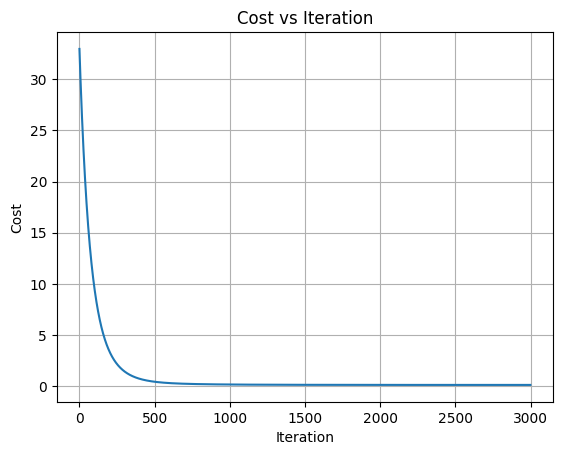

In [148]:
j_hist , w_featured , b_featured , x_mean ,x_std = regression_w_b(x_train_featured, ytrain ,  3000 , 1e-2 , 0.0, [0,1,2,3,4] , [])

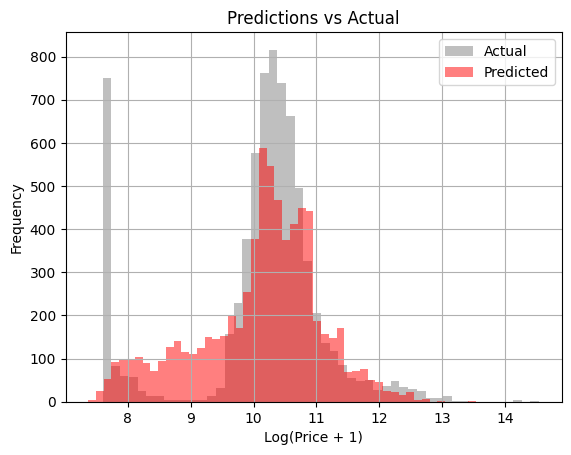

squared error : 0.13410274296871055


In [150]:
#  comapring for training set
x_train_featured_scaled= scale_x(x_train_featured , x_mean , x_std ,[0,1,2,3,4] , [])

y_train_val = np.dot(x_train_featured_scaled , w_featured ) +b_featured 

compare_histogram(  ytrain , y_train_val)


In [ ]:
j_hist[1499]

### check featured model for validation data

In [152]:
x_val_featured = prepare_x(dfval)

x_val_featured_scaled= scale_x(x_val_featured , x_mean , x_std ,[0,1,2,3,4] , [] )


In [153]:
y_pred_val = np.dot(x_val_featured_scaled , w_featured ) +b_featured 
y_pred_val 

array([10.19648631, 10.70613151,  8.30160052, ...,  9.6869608 ,
       10.27756965, 10.63006662])

In [154]:
yval

array([ 9.77542688, 10.1924563 ,  7.60140233, ..., 10.27852782,
       10.00789261, 10.40414162])

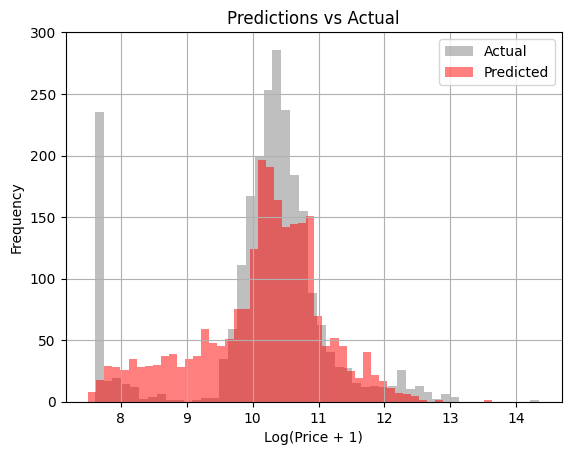

squared error : 0.13263634782192685


In [155]:
compare_histogram(  yval , y_pred_val)

# define categorical variable and add binary columns

In [156]:
dftrain.select_dtypes(include='object').dtypes

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

### feature all categerical variable



In [157]:
categorical_variable = [ 'make' ,'model','engine_fuel_type', 'transmission_type' ,  
'driven_wheels'   ,     
'market_category'  ,   
'vehicle_size'   ,      
'vehicle_style' ]
categorical_variable

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [158]:
categories ={}                               #values _counts is used for returnning a new dataframe of frequencies of each category
for c in categorical_variable:
    categories[c]=list(df[c].value_counts().head().index)

In [159]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

### Final function for preparing a fetured matrix from a dataframe

In [160]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()  # Assumes 'base' is a predefined list of base features

    df['age'] = 2017 - df.year    #add a new numerical feature named age
    features.append('age')

    for v in [2, 3, 4]:
        feature = f'num_doors_{v}'
        df[feature] = (df['number_of_doors'] == v).astype(int)  
        features.append(feature)

    for cat, values in categories.items():  # Assumes 'categories' is a list of tuples: (colname, [values])
        for v in values:
            feature_name = f'{cat}_{v}'
            df[feature_name] = (df[cat] == v).astype(int)
            features.append(feature_name)
    
    df_num = df[features].fillna(0)
    xnew = df_num.values

    return  xnew


In [161]:
x_train_featured= prepare_x(dftrain)
x_train_featured


array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [300.,   6.,  31., ...,   0.,   1.,   0.],
       [210.,   4.,  30., ...,   0.,   0.,   0.],
       [285.,   6.,  22., ...,   0.,   0.,   0.]])

In [162]:
num_indices = [0, 1, 2 ,3,4,5]     # as I have first five indices numerical type
cat_indices = list(set(range(46)) - set(num_indices))



### check featured model for training data

 0 iteration cost : 48.30216564845157 
 500 iteration cost : 0.25994915746081293 
 1000 iteration cost : 0.18973330143224532 
 1500 iteration cost : 0.16439159811728368 
 2000 iteration cost : 0.15095089082973165 
 2500 iteration cost : 0.14244164007998197 
 3000 iteration cost : 0.13659219219507684 
 3500 iteration cost : 0.1323796285360821 
 4000 iteration cost : 0.12924472503688447 
 4500 iteration cost : 0.1268485546549708 


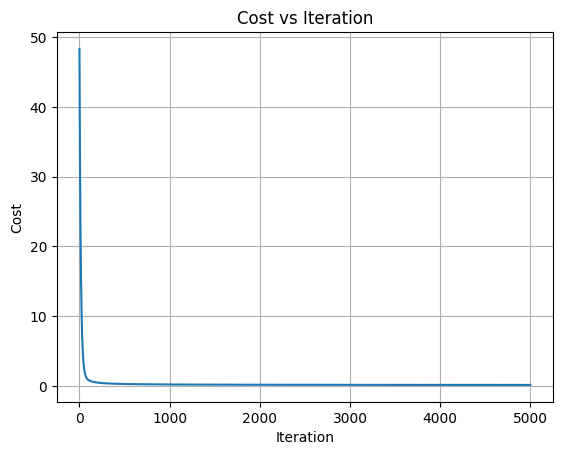

In [165]:
j_hist , w_featured , b_featured , x_mean ,x_std = regression_w_b(x_train_featured, ytrain , 5000 , 1e-2 , 0.0,num_indices, cat_indices)

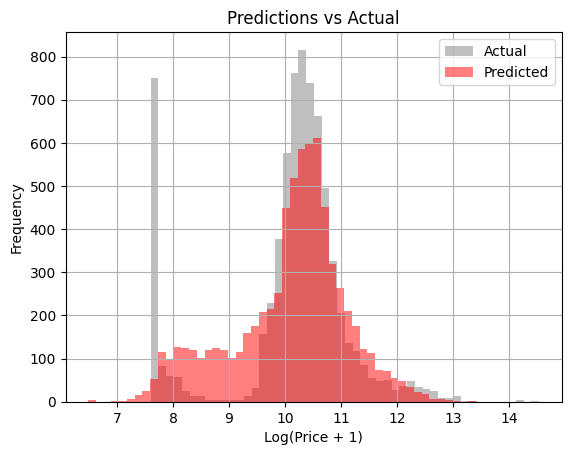

squared error : 0.12497660405058271


In [166]:
x_train_featured_scaled= scale_x(x_train_featured , x_mean , x_std ,num_indices, cat_indices )

y_pred_featured = np.dot(x_train_featured_scaled , w_featured ) +b_featured 

compare_histogram(  ytrain , y_pred_featured)

In [167]:
ytrain , y_pred_featured

(array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.91328684,
        10.28247178, 10.45380308]),
 array([ 9.39118889,  9.58058939, 10.32023835, ..., 11.13115866,
        10.38764146, 10.68229922]))

In [168]:
x_train_featured_scaled[0]

array([-0.900346  , -0.90256455,  0.68024314,  0.46267707, -0.10840107,
        0.29759883,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

### visualising functions

In [169]:
def scatter_visu(y_true , y_pred):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.4, color='tomato', edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Perfect prediction')
    plt.xlabel("Actual Price (Log or Raw)")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.show()

In [170]:
def residual_visu(y_true , y_pred):
    residuals = y_true - y_pred

    plt.figure(figsize=(8,5))
    plt.scatter(y_pred, residuals, alpha=0.5, color='mediumblue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.title("Residual Plot")
    plt.grid(True)
    plt.show()
    
    


    

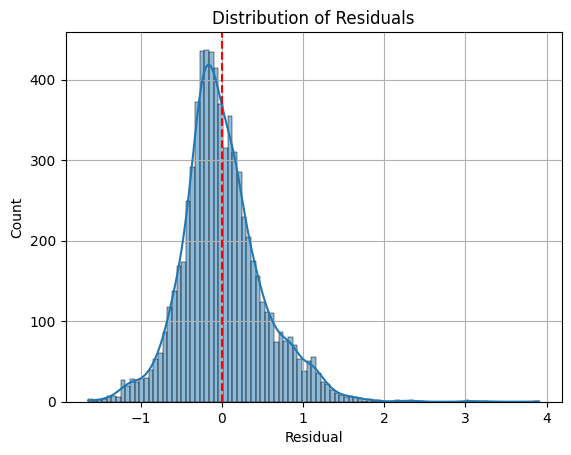

In [171]:
sns.histplot(ytrain -y_pred_featured, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


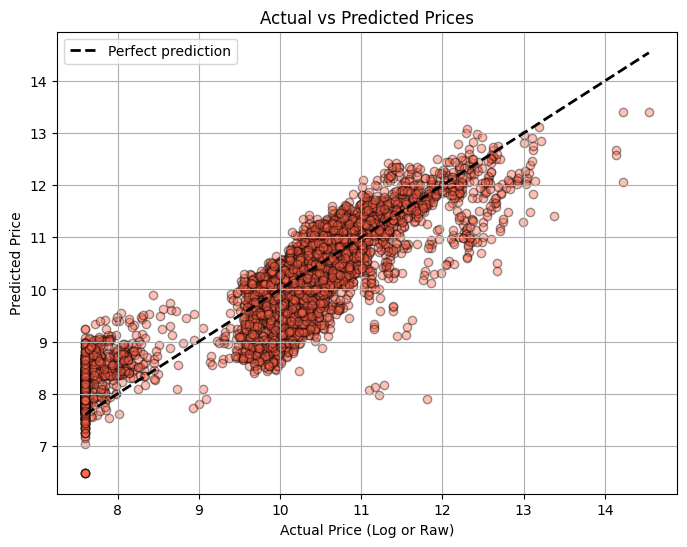

In [172]:
scatter_visu(ytrain , y_pred_featured)

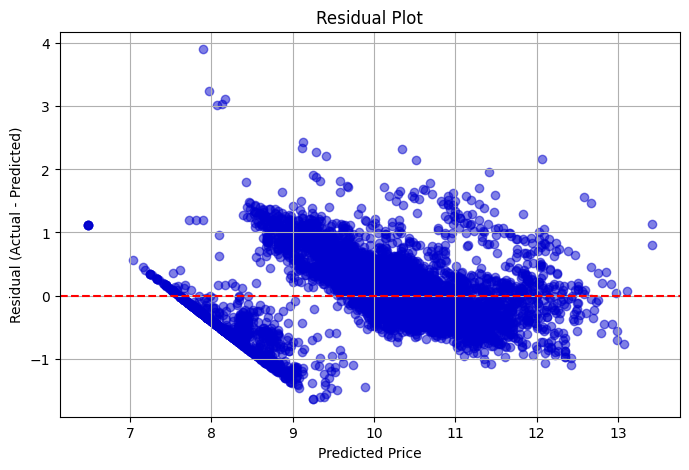

In [173]:
residual_visu(ytrain , y_pred_featured)

### validation on featured matrix

In [174]:
x_val_featured = prepare_x(dfval)

x_val_featured_scaled= scale_x(x_val_featured , x_mean , x_std, num_indices , cat_indices )



In [175]:
y_pred_val = np.dot(x_val_featured_scaled , w_featured ) +b_featured 
y_pred_val 


array([10.04571318, 10.49113917,  8.06278106, ...,  9.59173969,
       10.22320321, 10.66060699])

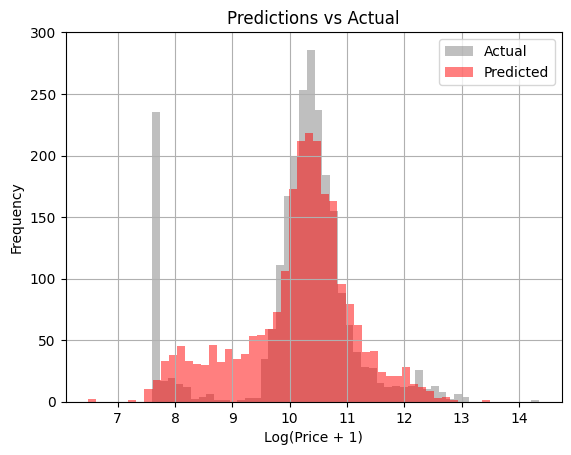

squared error : 0.11883603377797204


In [176]:
compare_histogram(  yval , y_pred_val) # this gives quite good results so validation is succesfull
# 

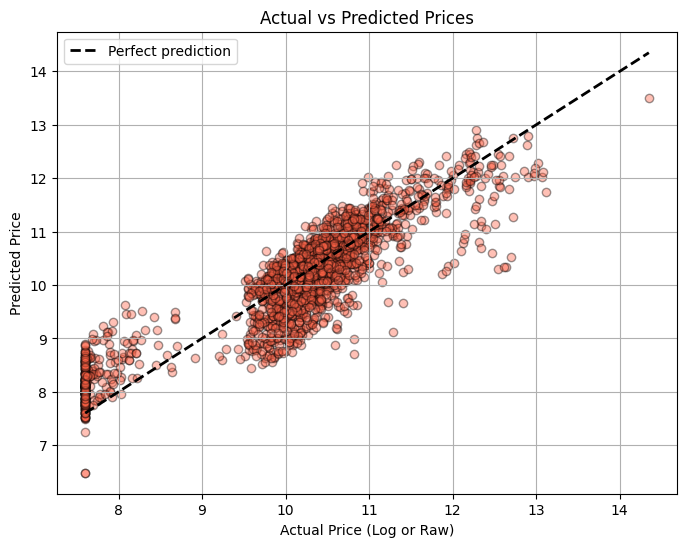

In [177]:
scatter_visu(yval , y_pred_val)

# model tuning 


## try deffrent values of alpha

 0 iteration cost : 23.354684841437674 
 200 iteration cost : 0.15068142389566686 
 400 iteration cost : 0.12916972930300616 
 600 iteration cost : 0.12221817971729775 
 800 iteration cost : 0.11895857316492445 
 1000 iteration cost : 0.11697352594950337 
 1200 iteration cost : 0.11554260719934677 
 1400 iteration cost : 0.11440733636119521 
 1600 iteration cost : 0.1134578736348435 
 1800 iteration cost : 0.11263981157091503 


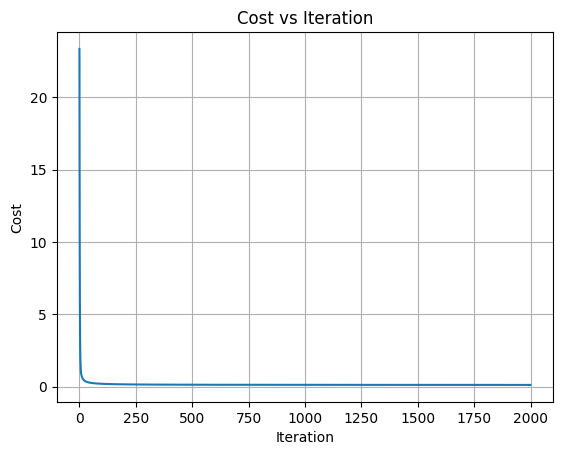

 0 iteration cost : 48.30216564845157 
 200 iteration cost : 0.4566773737804824 
 400 iteration cost : 0.29240081148141445 
 600 iteration cost : 0.23750288810426878 
 800 iteration cost : 0.2080884903171813 
 1000 iteration cost : 0.18973330143224532 
 1200 iteration cost : 0.17722309716247667 
 1400 iteration cost : 0.16810341387763184 
 1600 iteration cost : 0.16110407647477393 
 1800 iteration cost : 0.15552384870502026 


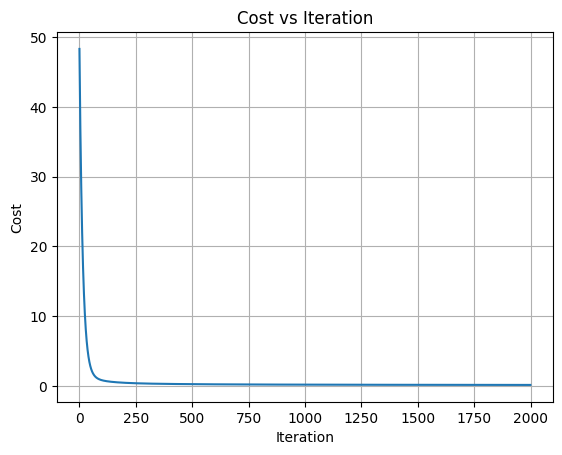

 0 iteration cost : 51.31329247282126 
 200 iteration cost : 14.205053118205818 
 400 iteration cost : 4.5395578358307835 
 600 iteration cost : 1.9136008061955174 
 800 iteration cost : 1.1250435699252395 
 1000 iteration cost : 0.8357981864399666 
 1200 iteration cost : 0.6953723016265667 
 1400 iteration cost : 0.6081330202874009 
 1600 iteration cost : 0.5455092697845392 
 1800 iteration cost : 0.4973420212536789 


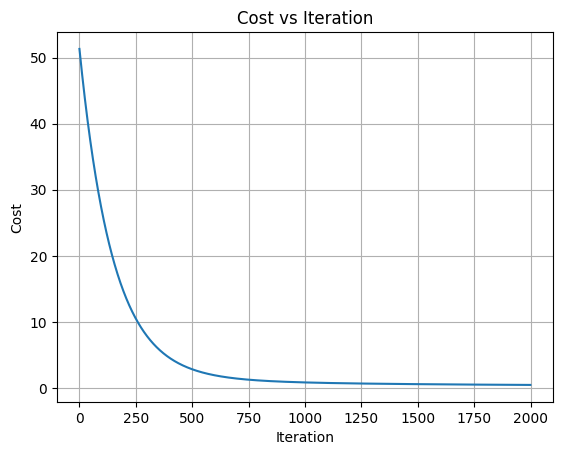

 0 iteration cost : 51.61956894269491 
 200 iteration cost : 45.24719755804971 
 400 iteration cost : 39.684521109301144 
 600 iteration cost : 34.8280366267875 
 800 iteration cost : 30.5875037425108 
 1000 iteration cost : 26.88424280635367 
 1200 iteration cost : 23.649651628426472 
 1400 iteration cost : 20.823912737200835 
 1600 iteration cost : 18.354866660260704 
 1800 iteration cost : 16.19702988590672 


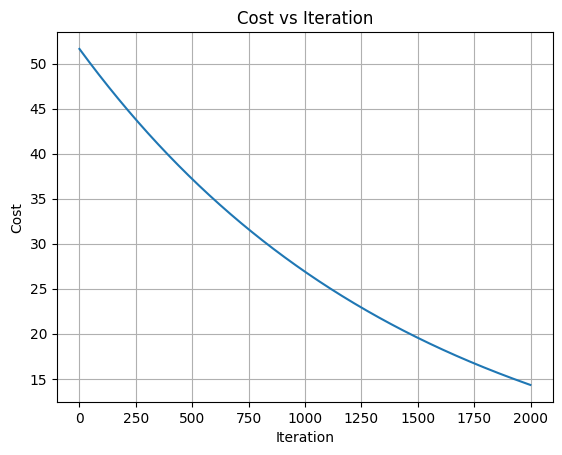

In [178]:
for i in [0.1 , .01 , 0.001 , 0.0001]: #try deffrent values of alpha
    j_hist , w_featured , b_featured , x_mean ,x_std = regression_w_b(x_train_featured, ytrain , 2000 , i , 0.0,num_indices, cat_indices)
    
    

In [ ]:
# form the above for graphs we can directly say that best value of alpha is 0.001
# but by pltting histographs we can see that 0.001 is a goos value for alpha
#so lets calculate the final values of w and b




 0 iteration cost : 23.354684841437674 
 500 iteration cost : 0.12492665243985665 
 1000 iteration cost : 0.11697352594950337 
 1500 iteration cost : 0.1139135602649214 
 2000 iteration cost : 0.11192241209868546 
 2500 iteration cost : 0.11045626907145611 
 3000 iteration cost : 0.1093322904442199 
 3500 iteration cost : 0.10845370430585127 
 4000 iteration cost : 0.10775821665774195 
 4500 iteration cost : 0.10720233333881672 


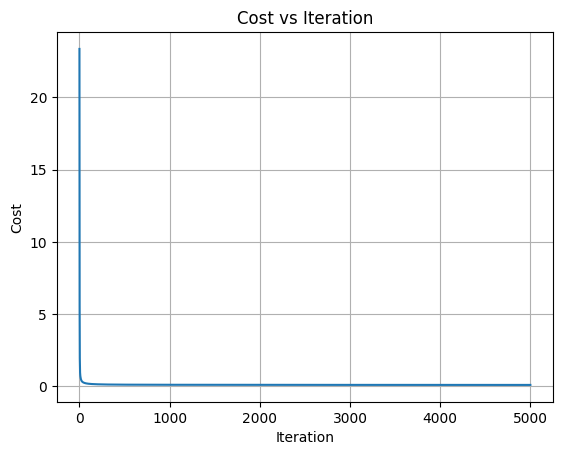

In [179]:
j_hist , w_featured , b_featured , x_mean ,x_std = regression_w_b(x_train_featured, ytrain , 5000 , 0.1 , 0.0,num_indices, cat_indices)

In [180]:
y_pred_val = np.dot(x_val_featured_scaled , w_featured ) +b_featured 
y_pred_val 

array([10.09727536, 10.55524763,  8.22277048, ...,  9.63411701,
       10.12168767, 10.58978755])

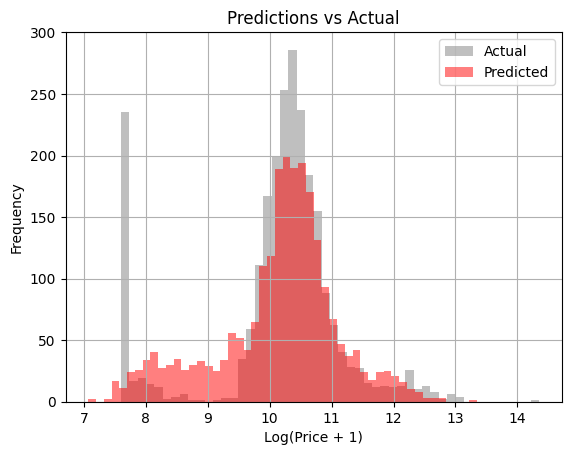

squared error : 0.10243462415798335


In [181]:
compare_histogram(  yval , y_pred_val)

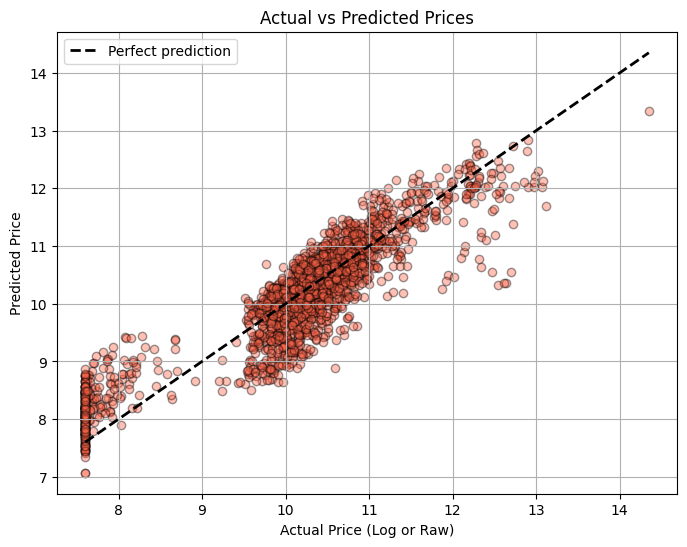

In [182]:
scatter_visu(yval , y_pred_val)

## further we can concate the ytest and yval to make this more accurate but we are stopped here becuase we will try some new and advnced algorithms like Xgboost and randomfores

In [183]:
np.expm1( y_pred_val)[:5] , np.expm1( yval)[:5]   #we have to take exponentiation as we have taken logarithm before 

(array([24275.77387553, 38377.30614601,  3723.80759536, 12334.32890486,
        31606.07726901]),
 array([17595., 26700.,  2000.,  3211., 31120.]))

## congratulations  , you have made your first linear regression model